# Training our Resdiual CNN

This notebook declares and trains a residual CNN for classification on the Google Landmarks challenge.

In [ ]:
from model import *
import matplotlib.pyplot as plt
import math
import tensorflow as tf
import keras.backend as K

sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
# Check console to see if tf backend is running on GPU!

data_dir = 'mini-train'
mean = np.load('mean_mini_train.npy')
std = np.load('std_mini_train.npy')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Sanity check

In [2]:
sanity = declare_model()
hist = compile_and_train(sanity, data_dir, 5, mean, std)
print(hist.history.keys())

plt.figure()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.figure()
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

50000 train samples
10000 test samples


## Coarse grained hyper parameter tuning

In [3]:
results = {}
for reg, lr in zip(10**np.random.uniform(-5, -1, size=10), 10**np.random.uniform(-8, -1, size=10)):
        K.clear_session()
        model = declare_model(reg)
        hist = compile_and_train(model, data_dir, 5, mean, std, lr=lr, steps_per_epoch=900) # steps_per_epoch=9000
        results[(lr, reg)] = (np.max(hist.history['gap']), np.max(hist.history['val_acc']))

#Visualize results
x_scatter = [math.log10(x[0]) for x in results]
y_scatter = [math.log10(x[1]) for x in results]
# plot training accuracy
marker_size = 100
colors = [results[x][0] for x in results]
plt.figure()
plt.scatter(x_scatter, y_scatter, marker_size, c=colors, cmap=plt.get_cmap('plasma'))
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('Global average precision')

# plot validation accuracy
colors = [results[x][1] for x in results] # default size of markers is 20
plt.figure()
plt.scatter(x_scatter, y_scatter, marker_size, c=colors, cmap=plt.get_cmap('plasma'))
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('Validation accuracy')
plt.show()

(45000, 32, 32, 3)
(45000, 1)
(5000, 32, 32, 3)


## Training sequence

## Fine grained hyper parameter tuning

In [5]:
results = {}
for reg, lr in zip(10**np.random.uniform(-5, -1, size=10), 10**np.random.uniform(-8, -1, size=10)):
        K.clear_session()
        model = declare_model(reg)
        hist = compile_and_train(model, data_dir, 5, mean, std, lr=lr, steps_per_epoch=1200) # steps_per_epoch=9000
        results[(lr, reg)] = (np.max(hist.history['gap']), np.max(hist.history['val_acc']))

#Visualize results
x_scatter = [math.log10(x[0]) for x in results]
y_scatter = [math.log10(x[1]) for x in results]
# plot training accuracy
marker_size = 100
colors = [results[x][0] for x in results]
plt.figure()
plt.scatter(x_scatter, y_scatter, marker_size, c=colors, cmap=plt.get_cmap('plasma'))
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('Global average precision')

# plot validation accuracy
colors = [results[x][1] for x in results] # default size of markers is 20
plt.figure()
plt.scatter(x_scatter, y_scatter, marker_size, c=colors, cmap=plt.get_cmap('plasma'))
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('Validation accuracy')
plt.show()

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Train on 45000 samples, validate on 5000 samples
Epoch 1/2
45000/45000 [==============================] - 479s 11ms/step - loss: 13.5643 - val_loss: 13.6940
Epoch 2/2
45000/45000 [==============================] - 503s 11ms/step - loss: 13.5758 - val_loss: 13.6940


## Training sequence

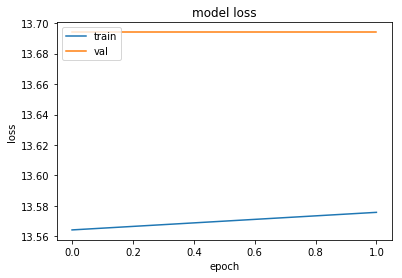

In [9]:
K.clear_session()
model = declare_model(reg)
hist = compile_and_train(model, data_dir, 10, mean, std, checkpoint_dir='mini-train-checkpoints',
                         lr=lr, use_tfboard=True)
print('Max val-GAP achieved = {}'.format(np.max(hist.history['gap'])))

## Testing

hello
